In [1]:
import ast
import json
import csv
import sys
import os
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

data_path = '../../data'

# Step 1: Read data from the structured JSON files for equal data
with open(f'{data_path}/scored_equal.json', 'r') as f:
    equal_data = json.load(f)  # Load the data from JSON file into a Python list

# Step 2: Read data from the structured JSON files for non-equal data
with open(f'{data_path}/scored_non_equal.json', 'r') as f:
    non_equal_data = json.load(f)

In [28]:
# Plotting histogram
def plot_histogram(ai_data, human_data):
    plt.figure(figsize=(12, 6))
    plt.hist(ai_data, bins=50, alpha=0.5, label='AI Responses')
    plt.hist(human_data, bins=50, alpha=0.5, label='Human Responses')
    plt.title('Distribution of Response Char Lengths')
    plt.xlabel('Length of Responses')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


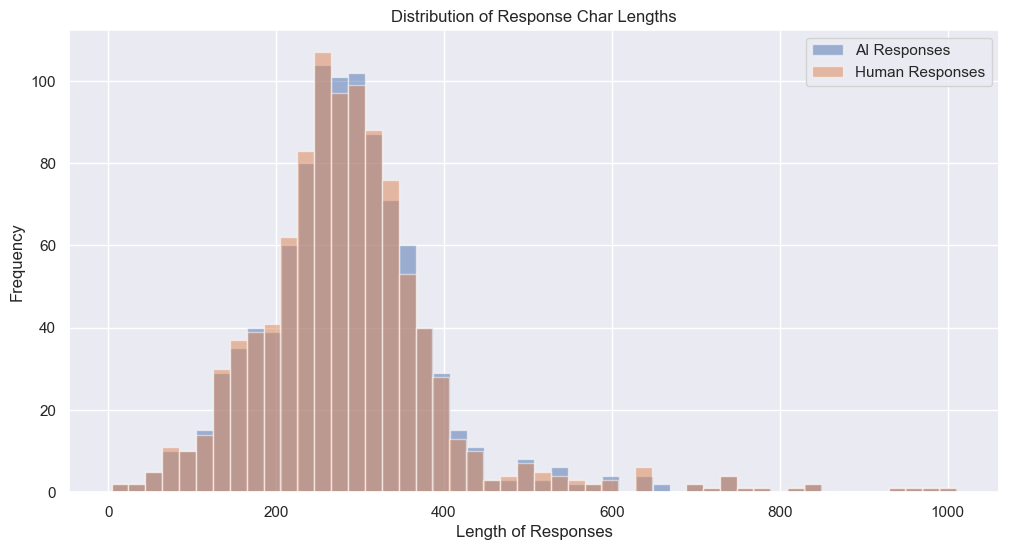

In [4]:
# Plot equals sequence chars distribution
equal_ai_responses = [data['ai_response'] for data in equal_data]
equal_human_responses = [data['human_response'] for data in equal_data]

equal_ai_responses_len = [len(data) for data in equal_ai_responses]
equal_human_responses_len = [len(data) for data in equal_human_responses]

plot_histogram(equal_ai_responses_len, equal_human_responses_len)

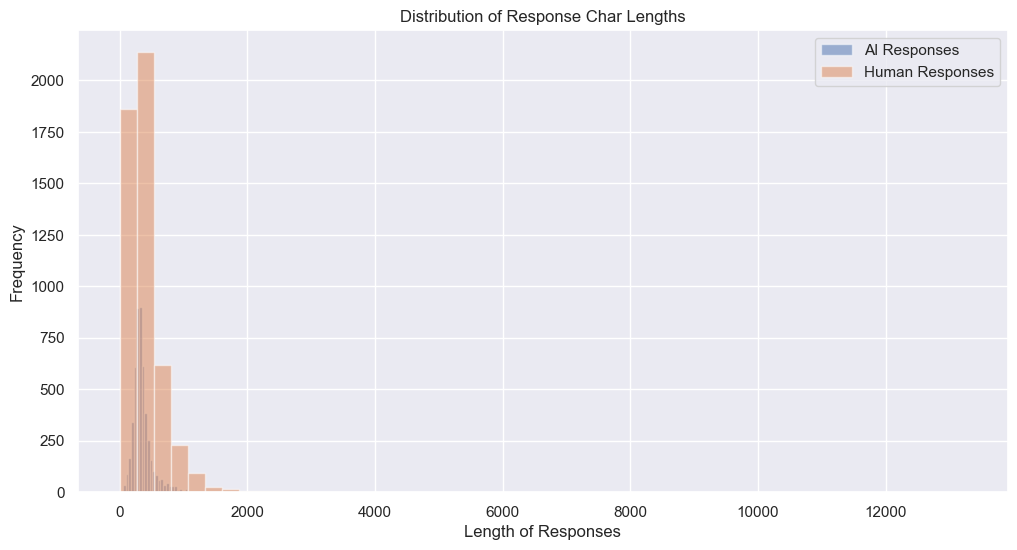

In [5]:
# Plot unequals sequence chars distribution
non_equal_ai_responses = [data['ai_response'] for data in non_equal_data]
non_equal_human_responses = [data['human_response'] for data in non_equal_data]

non_equal_ai_responses_len = [len(data) for data in non_equal_ai_responses]
non_equal_human_responses_len = [len(data) for data in non_equal_human_responses]

plot_histogram(non_equal_ai_responses_len, non_equal_human_responses_len)

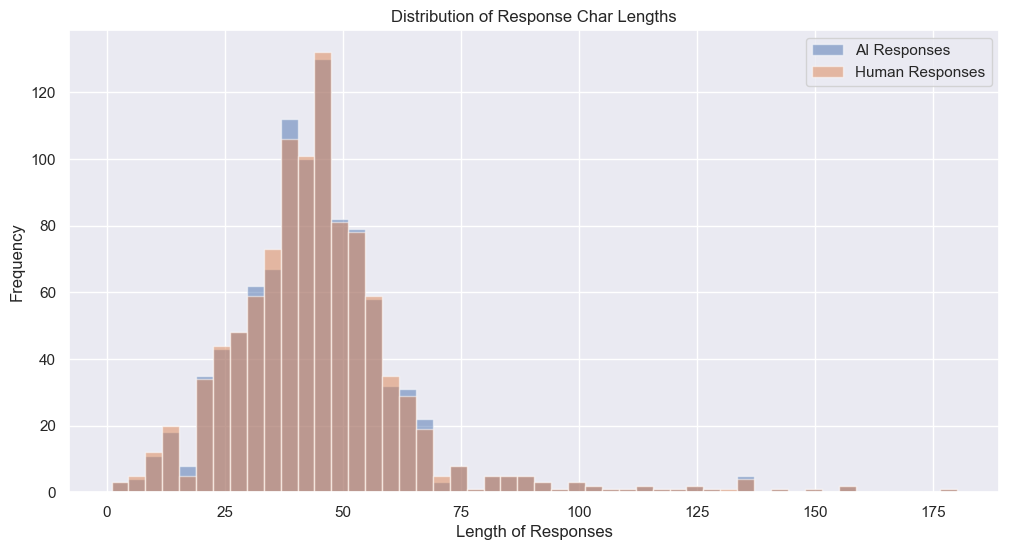

In [6]:
# Plot equals sequence word distribution
equal_ai_responses = [data['ai_response'] for data in equal_data]
equal_human_responses = [data['human_response'] for data in equal_data]

equal_ai_responses_len = [len(data.split(' ')) for data in equal_ai_responses]
equal_human_responses_len = [len(data.split(' ')) for data in equal_human_responses]

plot_histogram(equal_ai_responses_len, equal_human_responses_len)

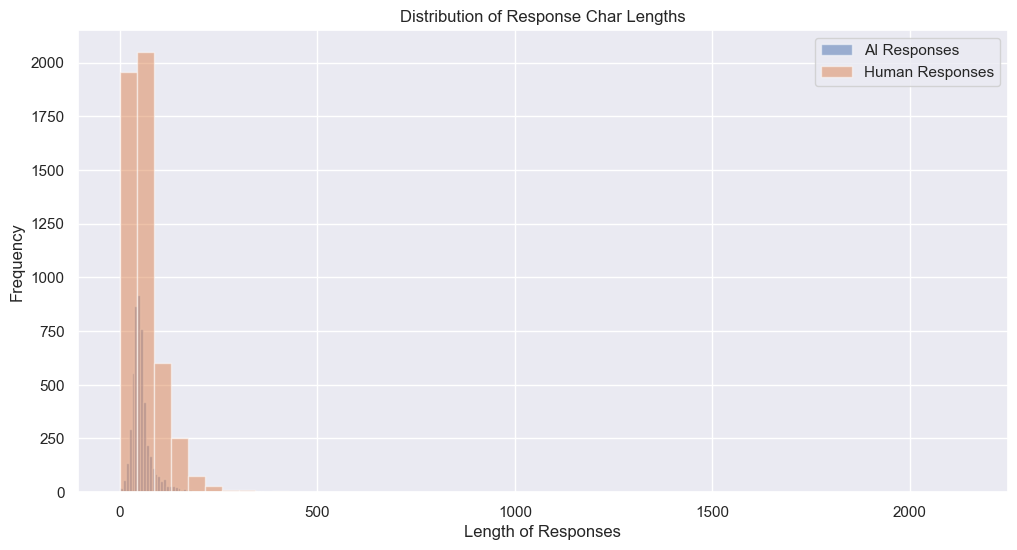

In [7]:
# Plot unequals sequence chars distribution
non_equal_ai_responses = [data['ai_response'] for data in non_equal_data]
non_equal_human_responses = [data['human_response'] for data in non_equal_data]

non_equal_ai_responses_len = [len(data.split(' ')) for data in non_equal_ai_responses]
non_equal_human_responses_len = [len(data.split(' ')) for data in non_equal_human_responses]

plot_histogram(non_equal_ai_responses_len, non_equal_human_responses_len)

In [25]:
# Plotting histogram
def plot_score_histogram(ai_data, human_data):
    plt.figure(figsize=(12, 6))
    plt.hist(ai_data, bins=50, alpha=0.5, label='Overall Score')
    plt.hist(human_data, bins=50, alpha=0.5, label='Response similarity')
    plt.title('Distribution of Similarity scores')
    plt.xlabel('Scores')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

14


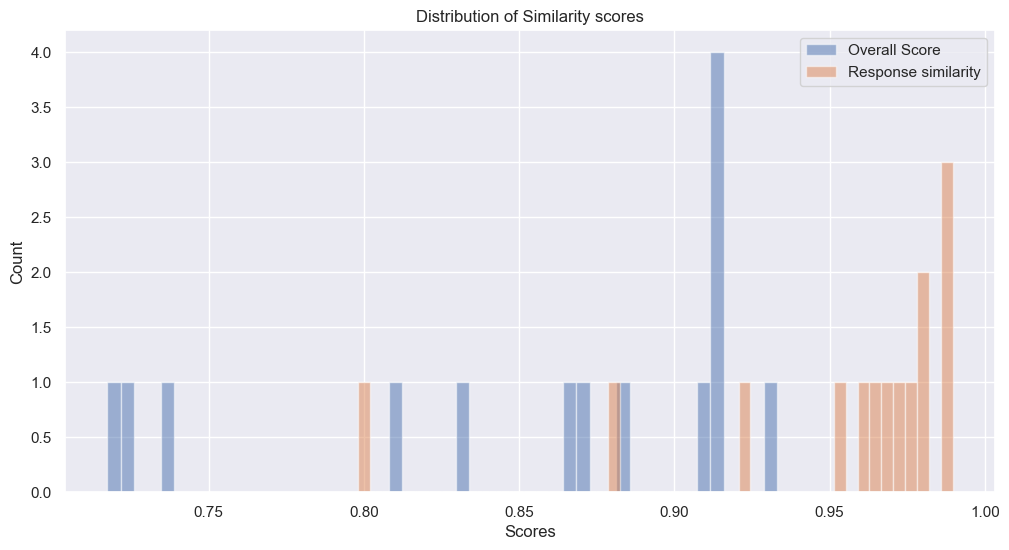

In [26]:
# Plot for AI response score 
equal_ai_scores = [data['score'] for data in equal_data]
equal_response_scores = [data['scores']['responses_similarity'] for data in equal_data]

equal_ai_scores = []
equal_response_scores = []
for data in equal_data:
    similarity = data['scores']['responses_similarity']
    if similarity < 0.99:
        equal_ai_scores.append(data['score'])
        equal_response_scores.append(data['scores']['responses_similarity'])

print(len(equal_ai_scores))
plot_score_histogram(equal_ai_scores, equal_response_scores)

4310


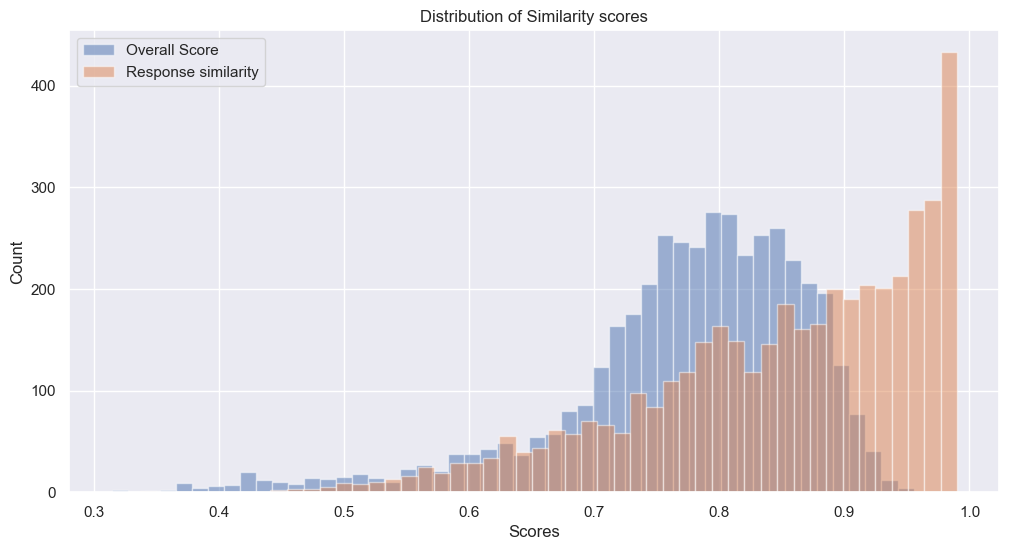

In [27]:
# Plot for AI response score 
non_equal_ai_scores = [data['score'] for data in non_equal_data]
non_equal_response_scores = [data['scores']['responses_similarity'] for data in non_equal_data]

non_equal_ai_scores = []
non_equal_response_scores = []
for data in non_equal_data:
    similarity = data['scores']['responses_similarity']
    if similarity < 0.99:
        non_equal_ai_scores.append(data['score'])
        non_equal_response_scores.append(data['scores']['responses_similarity'])

print(len(non_equal_ai_scores))
plot_score_histogram(non_equal_ai_scores, non_equal_response_scores)

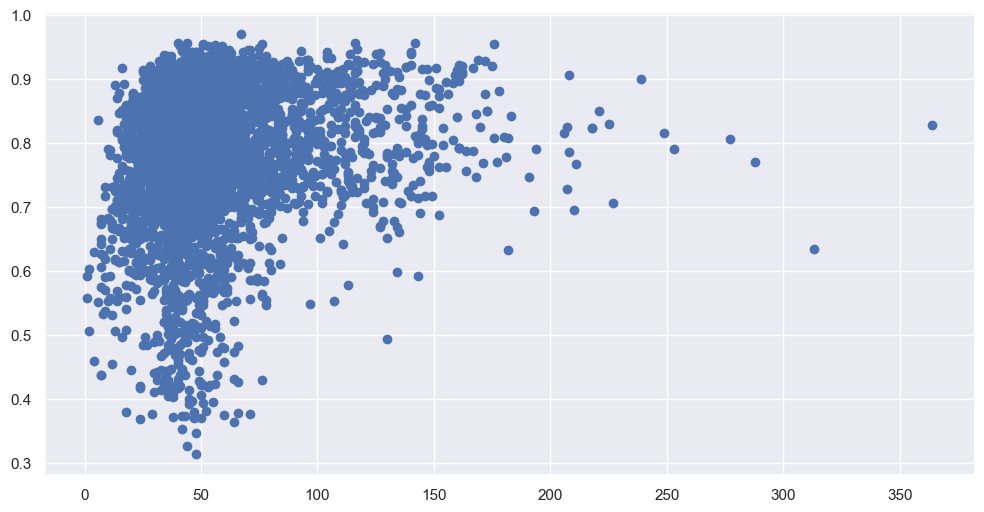

In [33]:
# Global score vs char len
non_equal_ai_scores = [data['score'] for data in non_equal_data]
plt.figure(figsize=(12, 6))
plt.scatter(non_equal_ai_responses_len, non_equal_ai_scores)

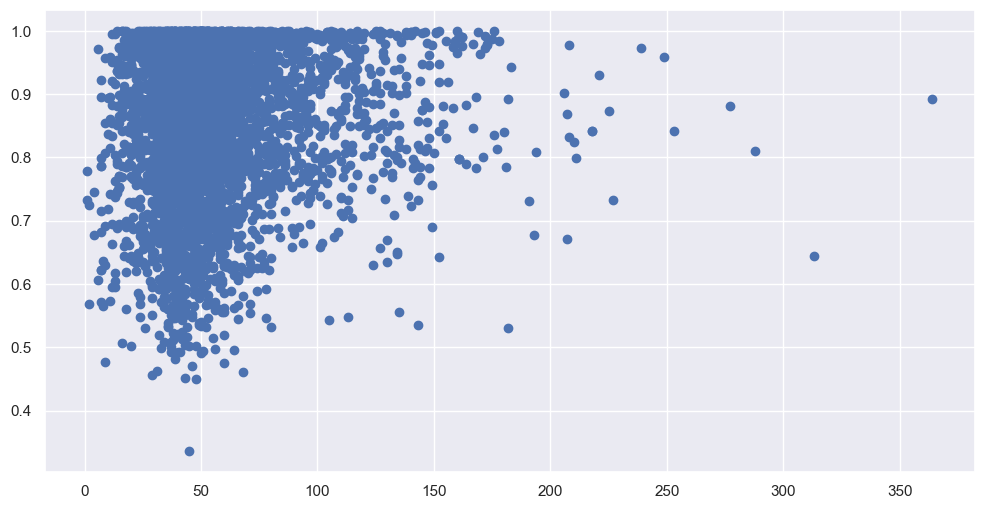

In [34]:
# response score vs char len
non_equal_ai_scores = [data['scores']['responses_similarity'] for data in non_equal_data]
plt.figure(figsize=(12, 6))
plt.scatter(non_equal_ai_responses_len, non_equal_ai_scores)

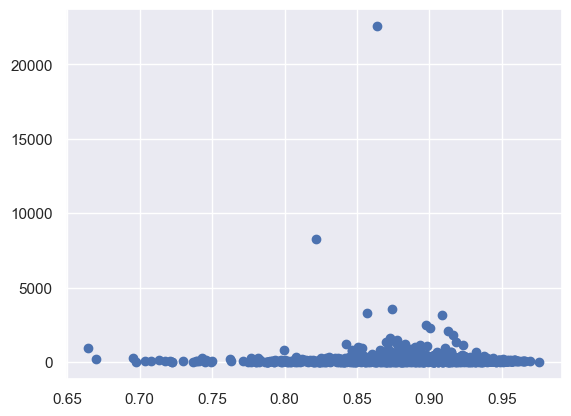

In [55]:
sums = []
score = []
for data in equal_data:
    prev = data['prev_context_conversation']
    lens = [len(list(msg.values())[0].split(' ')) for msg in prev]
    sums.append(sum(lens))
    score.append(data['score'])

plt.scatter(score, sums)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

def get_frequent_words(responses):
    # Example using bigrams
    vectorizer = CountVectorizer(ngram_range=(2, 3))
    X = vectorizer.fit_transform(responses)

    # Summing up the occurrences of each bigram and sorting
    bigrams = zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0))
    sorted_bigrams = sorted(bigrams, key=lambda x: x[1], reverse=True)

    # Display the top 10 bigrams
    for bigram, frequency in sorted_bigrams[:10]:
        print(f"{bigram}: {frequency}")


In [9]:
print('Top 10 most frequent ai n-grams')
get_frequent_words(equal_ai_responses)

Top 10 most frequent ai n-grams
regards person: 618
thank you: 575
you for: 530
thank you for: 529
best regards: 432
best regards person: 373
for your: 330
person thank: 327
person thank you: 327
to hear: 283


In [10]:

print('Top 10 most frequent human n-grams')
get_frequent_words(equal_human_responses)

Top 10 most frequent human n-grams
regards person: 625
thank you: 575
you for: 530
thank you for: 529
best regards: 440
best regards person: 380
for your: 330
person thank: 325
person thank you: 325
to hear: 283


In [11]:
print('Top 10 most frequent ai n-grams')
get_frequent_words(non_equal_ai_responses)

Top 10 most frequent ai n-grams
thank you: 3034
you for: 2742
thank you for: 2731
regards person: 2614
best regards: 2168
your order: 1718
for your: 1661
best regards person: 1614
for the: 1573
person thank: 1530


In [12]:
print('Top 10 most frequent human n-grams')
get_frequent_words(non_equal_human_responses)

Top 10 most frequent human n-grams
thank you: 3226
you for: 2750
thank you for: 2738
if you: 2129
for your: 1703
hi person: 1695
your order: 1685
you have: 1571
person thank: 1510
person thank you: 1510
